In [163]:
# NOTE: This script is unsolved - some of the code has been removed
# and is to be completed in demonstration

In [164]:
# Add function for notebook plots


In [165]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [152]:
# Define variables
csv_path = '../Resources/SF_Police_Department_Incidents_2018_clean.csv'
dist_table ="../Resources/SF_dist.csv"
summary_table = '../Resources/output.csv'

In [153]:
# Read in dist_table
dist_table = pd.read_csv(dist_table)
# Read in CSV, run query, specify columns
df = pd.read_csv(csv_path)
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,189014013,NON-CRIMINAL,"STAY AWAY OR COURT ORDER, NON-DV RELATED",Monday,01/01/2018,22:37,TARAVAL,"ARREST, BOOKED",3500 Block of 19TH AV,-122.474829,37.723976,"(37.723975823482135, -122.47482947577244)",18901401371024
1,186095971,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Monday,01/01/2018,08:00,TENDERLOIN,NONE,500 Block of EDDY ST,-122.416711,37.783357,"(37.78335703909351, -122.41671073384802)",18609597119050
2,186084021,FRAUD,"CREDIT CARD, THEFT BY USE OF",Monday,01/01/2018,00:01,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223,37.781896,"(37.78189594886033, -122.42822330317604)",18608402109320
3,186072593,NON-CRIMINAL,LOST PROPERTY,Monday,01/01/2018,17:00,MISSION,NONE,2100 Block of MARKET ST,-122.429789,37.766652,"(37.766652147476215, -122.4297889869883)",18607259371000
4,186063279,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,01/01/2018,22:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.40340479147905)",18606327906244


In [154]:
# Apply lambda function to the value_counts       
dfnew=df.groupby('PdDistrict')['Category'].apply(lambda x: x.value_counts().head(1))
dfnew.header= ['PdDistrict','Category','SUM']
dfnew.to_csv(summary_table,header=True, index_label=dfnew.header)
summary_table_new = pd.read_csv(summary_table)
summary_table_new.head()

,PdDistrict,Category,SUM,Category.1
0,BAYVIEW,LARCENY/THEFT,816,NaN
1,CENTRAL,LARCENY/THEFT,2170,NaN
2,INGLESIDE,LARCENY/THEFT,534,NaN
3,MISSION,LARCENY/THEFT,1698,NaN
4,NORTHERN,LARCENY/THEFT,2191,NaN


In [155]:
# Add code to drop column

summary_table_new.head()

,PdDistrict,Category,SUM
0,BAYVIEW,LARCENY/THEFT,816
1,CENTRAL,LARCENY/THEFT,2170
2,INGLESIDE,LARCENY/THEFT,534
3,MISSION,LARCENY/THEFT,1698
4,NORTHERN,LARCENY/THEFT,2191


In [156]:
# Merge crime and district data

dist_output.head()  

,PdDistrict,Category,SUM,district,AREA_MI2
0,BAYVIEW,LARCENY/THEFT,816,BAYVIEW,7.22
1,CENTRAL,LARCENY/THEFT,2170,CENTRAL,2.01
2,INGLESIDE,LARCENY/THEFT,534,INGLESIDE,6.94
3,MISSION,LARCENY/THEFT,1698,MISSION,2.89
4,NORTHERN,LARCENY/THEFT,2191,NORTHERN,2.97


In [157]:
dist_output.to_csv('../Resources/dist_data.csv', encoding="utf-8", index=True,index_label=1)
dfnew= pd.read_csv("../Resources/dIst_data.csv")

In [158]:
val='Count_Norm'

dist_output.loc[:,'Count_Norm'] = val
dist_output.assign(val="")

dist_output[val]=dfnew["SUM"]/dfnew["AREA_MI2"]
dist_output.reset_index(drop=True)
dist_output.head()
dist_output.to_csv('../Resources/norm_data.csv',header=True,index_label=1)

In [159]:
df = pd.read_csv('../Resources/norm_data.csv')
df.head(10)

,1,PdDistrict,Category,SUM,district,AREA_MI2,Count_Norm
0,0,BAYVIEW,LARCENY/THEFT,816,BAYVIEW,7.22,113.019391
1,1,CENTRAL,LARCENY/THEFT,2170,CENTRAL,2.01,1079.601990
2,2,INGLESIDE,LARCENY/THEFT,534,INGLESIDE,6.94,76.945245
3,3,MISSION,LARCENY/THEFT,1698,MISSION,2.89,587.543253
4,4,NORTHERN,LARCENY/THEFT,2191,NORTHERN,2.97,737.710438
5,5,PARK,LARCENY/THEFT,575,PARK,3.04,189.144737
6,6,RICHMOND,LARCENY/THEFT,826,RICHMOND,4.95,166.868687
7,7,SOUTHERN,LARCENY/THEFT,2481,SOUTHERN,3.28,756.402439
8,8,TARAVAL,LARCENY/THEFT,767,TARAVAL,10.21,75.122429
9,9,TENDERLOIN,NON-CRIMINAL,371,TENDERLOIN,0.40,927.500000


<IPython.core.display.Javascript object>


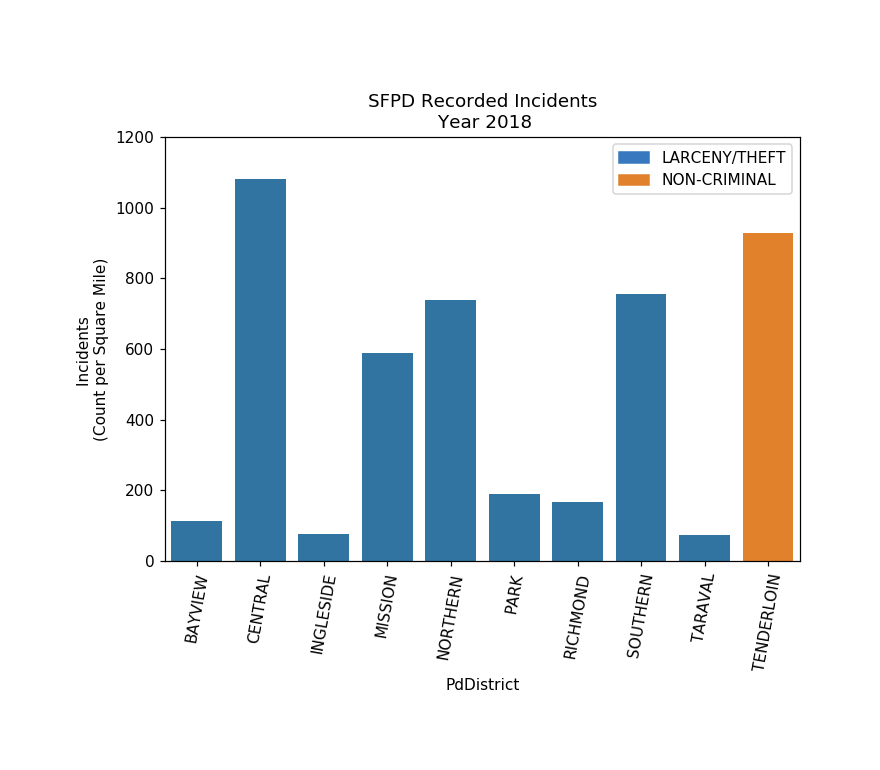

In [162]:
df['Color'] = pd.Series(pd.factorize(df['Category'])[0]).map(
    lambda x: sns.color_palette()[x])

# Use seaborn bar plot
sns.barplot(x='PdDistrict',y='Count_Norm', label='Category',data=df,palette=df['Color'])

# Specify patches for legend
cat1 = mpatches.Patch(color='#3778bf', label='LARCENY/THEFT')
cat2 = mpatches.Patch(color='#e1812c', label='NON-CRIMINAL')

plt.legend(handles=[cat1,cat2], loc=1)

# plot labels
xlabels=plt.xlabel('PdDistrict')
plt.ylabel('Incidents \n(Count per Square Mile)')
plt.title('SFPD Recorded Incidents\n Year 2018')

# Rotate x labels
plt.xticks(rotation=80)

# Modify size and border
plt.gcf().subplots_adjust(bottom=.8)
plt.rcParams['figure.figsize'] = [8,7]
plt.ylim(ymax=1200)
plt.tight_layout(pad=5, w_pad=1, h_pad=1.0)

# Output result to png
fname='../Resources/bar-viz.png'
plt.savefig(fname)

plt.show()